In [67]:
import matplotlib.pyplot as plt

# disable warnings to tidy up output
import warnings
warnings.filterwarnings("ignore")

# some basic libraries 
#import pandas as pd
#import seaborn as sns
import numpy as np
import pandas as pd
import glob
import noisereduce as nr
# plot support
import matplotlib.pyplot as plt
import soundfile as sf
import os
from google.cloud import storage
from scipy import signal
# reading audio datasets
import librosa
import librosa.display
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

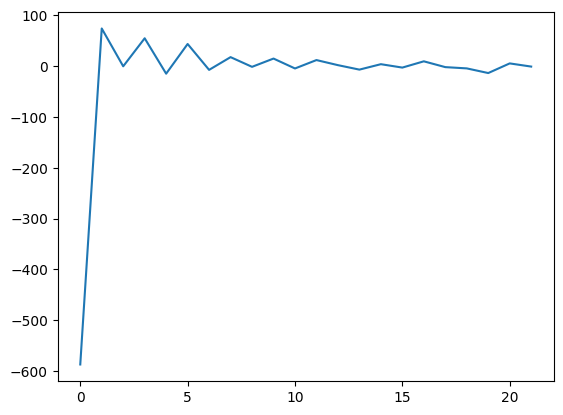

In [29]:
import os 

path = r'C:\Users\Tony\Documents\PEData\3_Dataset_PE_4\Aegotheles Cristatus\00003-2.wav'

y, sr = librosa.load(path)
# we are going to generate 1 set of MFCCs over the entire 5 second clip for now
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=22, hop_length = len(y)+1)
len(mfccs[0])

plt.plot(mfccs)

In [59]:
#generate mfcc's for entire folder
folder=r'C:\Users\Tony\Documents\PEData\3_Dataset_PE_4\Aegotheles Cristatus'

rows_list = []
file_list = []
for local_file in glob.glob(folder + '/**'):
    file_name = os.path.basename(local_file).split('.')[0]
    ext = os.path.basename(local_file).split('.')[1]

    y, sr = librosa.load(local_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=22, hop_length = len(y)+1)
    lst = [x for l in mfccs for x in l]

    rows_list.append(lst)
    file_list.append(file_name)
arr = np.array(rows_list)

# make the data into pandas dataframe
df = pd.DataFrame(arr)
df['file_name']=file_list
df.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,file_name
0,-228.706696,85.407059,-25.719421,34.990376,-26.806332,38.355484,-17.160900,-6.584590,4.096770,-0.818996,...,17.825081,-3.649412,-6.806066,13.943678,-8.578506,13.228951,-11.778416,-3.228286,2.837173,00001-0
1,-529.386230,25.660982,-1.753356,72.668312,-11.457065,47.183540,32.295982,-12.763142,19.687492,23.482800,...,-1.269729,14.631954,-5.635622,-3.536434,22.011440,-0.009093,6.951622,17.707600,-22.610424,00002-0
2,-543.648193,50.550816,-4.490395,49.099545,-18.404642,47.564800,11.747227,-1.966577,10.173929,11.459761,...,-4.900849,20.995178,-12.397302,1.089054,1.556187,-4.219734,5.458376,14.978334,-2.648649,00002-3
3,-524.568787,36.725861,5.993289,57.542908,-16.604193,25.074970,9.981180,-0.286500,18.486441,16.323132,...,-13.767720,8.498541,-1.510504,6.877133,15.926466,1.413869,-3.226873,13.141254,0.449624,00002-4
4,-574.421448,78.748573,22.534325,53.392868,-4.466472,36.185143,-15.050714,13.462059,-1.151725,21.001141,...,-1.742839,7.721112,2.770548,10.804724,-1.701752,3.515606,-5.016426,1.642637,-7.252687,00003-0


In [60]:
# explore the dataframe:
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,-559.509583,61.327778,4.427705,57.502953,-18.529261,39.158310,0.629562,9.187479,6.222941,12.839785,...,-2.211426,4.280525,8.456098,-1.782493,6.947949,-0.155923,5.245487,-1.787740,7.015923,-3.579510
std,58.295025,23.190876,17.834682,14.495689,12.389254,12.489573,13.207973,14.182609,12.833677,11.888531,...,9.246420,9.483294,9.430758,7.549963,7.208282,7.877863,7.285132,7.289931,7.589629,7.288674
min,-709.517578,0.083496,-80.131149,20.936548,-61.282906,9.831948,-36.497585,-28.210987,-22.012995,-27.650593,...,-33.448589,-16.033142,-22.558807,-22.357380,-11.499051,-22.791836,-17.538395,-29.666967,-15.171297,-27.221676
25%,-587.121780,46.331606,-6.412261,48.106212,-26.213285,29.852781,-8.299685,-1.115125,-3.436671,6.639274,...,-8.212204,-2.254872,4.227859,-6.687923,1.385954,-5.231823,0.360944,-7.109784,2.325238,-7.438039
50%,-559.123260,65.853317,4.378650,56.193485,-18.046164,38.235800,-0.213909,9.891728,4.551386,12.932080,...,-0.934336,3.231100,8.984480,-1.937985,6.878580,-0.253536,5.073326,-1.668986,6.801233,-3.488237
75%,-523.110153,79.630592,14.630049,66.284840,-11.613873,47.470644,7.152375,19.674733,14.673296,20.239599,...,4.620286,8.563034,14.574953,3.292671,11.609051,5.597075,9.721831,2.503150,11.904439,1.170632
max,-228.706696,116.821960,56.946175,96.253281,11.552646,80.946358,38.652206,40.861042,47.679859,47.936096,...,17.019770,29.103445,32.511253,17.737965,24.194284,22.011440,30.476196,18.228603,28.231663,11.641533


In [64]:
# minmax scaling on MFCCs

MFCC_cols = df.columns.difference(['file_name'])

scaler = MinMaxScaler()
scaled_MFCC = pd.DataFrame(scaler.fit_transform(df[MFCC_cols]), 
                                columns=MFCC_cols, 
                                index=df.index)



In [65]:
#add back in file names colunm:
scaled_MFCC['file_name']=file_list
scaled_MFCC.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,file_name
0,1.000000,0.730895,0.396942,0.186596,0.473348,0.401094,0.257309,0.313099,0.374640,0.354978,...,0.750128,0.343370,0.387858,0.712815,0.317239,0.640792,0.373491,0.275166,0.773453,00001-0
1,0.374641,0.219101,0.571778,0.686856,0.684087,0.525232,0.915419,0.223648,0.598347,0.676487,...,0.327083,0.675335,0.417050,0.223084,1.000000,0.365083,0.764551,0.757527,0.118653,00002-0
2,0.344978,0.432311,0.551811,0.373927,0.588700,0.530594,0.641982,0.379957,0.461840,0.517424,...,0.246636,0.790883,0.248410,0.352674,0.543443,0.277388,0.733374,0.694645,0.632295,00002-3
3,0.384660,0.313884,0.628291,0.486032,0.613419,0.214345,0.618482,0.404281,0.581113,0.581765,...,0.050190,0.563961,0.519933,0.514835,0.864185,0.394719,0.552036,0.652318,0.712018,00002-4
4,0.280976,0.673857,0.748960,0.430931,0.780065,0.370575,0.285388,0.603327,0.299332,0.643655,...,0.316601,0.549844,0.626704,0.624872,0.470726,0.438492,0.514673,0.387391,0.513828,00003-0


In [72]:
# run k-means for range of 10 clusters then analyse with elbow method
clusters = []

#drop target
X = scaled_MFCC.drop(columns=["file_name"])

km = KMeans(n_clusters=3).fit(X)

km.labels_

array([1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0])